In [1]:

import numpy as np 
import pandas as pd 

اتصال به درایو 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


وارد کردن کتابخانه ها

In [4]:
#importing libraries
import matplotlib.pyplot as plt
from keras import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, concatenate
from tensorflow.keras import Input

خارج کردن عکس ها

In [ ]:
!unzip pics.zip -d pics


Streaming output truncated to the last 5000 lines.
  inflating: pics/pics/5499.jpg      
  inflating: pics/pics/55.jpg        
  inflating: pics/pics/550.jpg       
  inflating: pics/pics/5500.jpg      
  inflating: pics/pics/5501.jpg      
  inflating: pics/pics/5502.jpg      
  inflating: pics/pics/5503.jpg      
  inflating: pics/pics/5504.jpg      
  inflating: pics/pics/5505.jpg      
  inflating: pics/pics/5506.jpg      
  inflating: pics/pics/5507.jpg      
  inflating: pics/pics/5508.jpg      
  inflating: pics/pics/5509.jpg      
  inflating: pics/pics/551.jpg       
  inflating: pics/pics/5510.jpg      
  inflating: pics/pics/5511.jpg      
  inflating: pics/pics/5512.jpg      
  inflating: pics/pics/5513.jpg      
  inflating: pics/pics/5514.jpg      
  inflating: pics/pics/5515.jpg      
  inflating: pics/pics/5516.jpg      
  inflating: pics/pics/5517.jpg      
  inflating: pics/pics/5518.jpg      
  inflating: pics/pics/5519.jpg      
  inflating: pics/pics/552.jpg       

وارد کردن دیتای عددی و کتگوریکال خانه ها 

In [5]:
df=pd.read_csv('desc.csv')
print(df)

       image_id                     street  ...  sqft   price
0             0      1317 Van Buren Avenue  ...  1560  201900
1             1             124 C Street W  ...   713  228500
2             2            2304 Clark Road  ...   800  273950
3             3         755 Brawley Avenue  ...  1082  350000
4             4      2207 R Carrillo Court  ...  2547  385100
...         ...                        ...  ...   ...     ...
15469     15469    4156 Sterlingview Drive  ...  4092  949000
15470     15470         4355 Avenida Prado  ...  2773  949900
15471     15471  12717 Koenigstein Rd Road  ...  1576  920000
15472     15472           36 Kunkle Street  ...  2086  997000
15473     15473        4562 Eastbourne Bay  ...  1216  975000

[15474 rows x 8 columns]


In [6]:
house_feature=df[['n_city','bed','bath','sqft','price']]
print(house_feature.shape)

(15474, 5)


نرمال سازی داده ها

In [7]:

house_feature['n_city']=house_feature['n_city']/max(house_feature['n_city'])
house_feature['bed']=house_feature['bed']/max(house_feature['bed'])
house_feature['sqft']=house_feature['sqft']/house_feature['sqft']
house_feature['bath']=house_feature['bath']/max(house_feature['bath'])
house_feature['price']=house_feature['price']/max(house_feature['price'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

نمونه عکس از دیتا

(311, 415, 3)


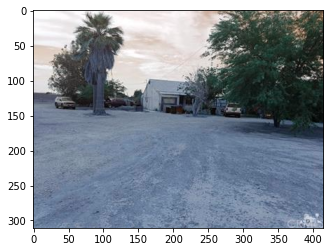

In [ ]:
import cv2
sample=cv2.imread('pics/pics/5.jpg')
plt.imshow(sample)
print(sample.shape)

ریسایز کردن عکس ها

In [ ]:
import os
import cv2
counter=0
images=np.zeros((15474,128,128,3),dtype='uint32')
for i in range(15474):

    sample=cv2.imread('pics/pics'+'/'+str(i)+'.jpg')
    imgs=cv2.resize(sample,(128,128))
    images[counter]=imgs
    counter+=1


جدا کردن مجموعه های اموزشی و تست از دیتا

In [ ]:

from sklearn.model_selection import train_test_split
split = train_test_split(house_feature, images, test_size=0.2, random_state=42)
(X_train,X_test,Ximage_train,Ximage_test) = split
y_train , y_test = X_train['price'].values , X_test['price'].values
X1_train=X_train[['n_city','bed','bath','sqft']].values
X2_train=Ximage_train
X1_test=X_test[['n_city','bed','bath','sqft']].values
X2_test=Ximage_test

ساخت شبکه عصبی معمولی 

In [ ]:
    model1 = Sequential()
    model1.add(Dense(8, input_dim=X1_train.shape[1], activation="relu"))
    model1.add(Dense(4, activation="relu"))
  

ساخت شبکه دوم کانولوشنال

In [ ]:
    inputShape = (128,128,3)
    inputs = Input(shape=inputShape)
    x = Conv2D(32, (3, 3), padding="same")(inputs)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(4)(x)
    x = Activation("relu")(x)
    model2 = Model(inputs, x)


نرکیب دو شبکه بالا و ساخت شبکه سوم

In [ ]:

combinedInput = concatenate([model1.output, model2.output])
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)


In [ ]:
from keras.optimizers import Adam
model = Model(inputs=[model1.input,model2.input], outputs=x)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mse", optimizer=opt)
# train the model
print("[INFO] training model...")

model.fit(x=[X1_train,X2_train], y=y_train,validation_data=([X1_test, X2_test], y_test),epochs=40, batch_size=128)


[INFO] training model...
Epoch 1/40
97/97 [==============================] - 320s 3s/step - loss: 0.0519 - val_loss: 0.0454
Epoch 2/40
97/97 [==============================] - 319s 3s/step - loss: 0.0320 - val_loss: 0.0391
Epoch 3/40
97/97 [==============================] - 318s 3s/step - loss: 0.0298 - val_loss: 0.0342
Epoch 4/40
97/97 [==============================] - 318s 3s/step - loss: 0.0285 - val_loss: 0.0326
Epoch 5/40
97/97 [==============================] - 318s 3s/step - loss: 0.0266 - val_loss: 0.0335
Epoch 6/40
97/97 [==============================] - 320s 3s/step - loss: 0.0245 - val_loss: 0.0309
Epoch 7/40
97/97 [==============================] - 318s 3s/step - loss: 0.0225 - val_loss: 0.0304
Epoch 8/40
97/97 [==============================] - 319s 3s/step - loss: 0.0200 - val_loss: 0.0326
Epoch 9/40
97/97 [==============================] - 320s 3s/step - loss: 0.0177 - val_loss: 0.0318
Epoch 10/40
97/97 [==============================] - 318s 3s/step - loss: 0.0153 - v

model.save('finalann')

In [ ]:
model.save('my_model.h5')
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32) 128         activation[0][0]                 
_______________________________________________________________________________________

In [11]:
attr_sample=df.loc[df['image_id'] == 60]
print(attr_sample)

   image_id                 street          city  ...  bath  sqft   price
4         4  2207 R Carrillo Court  Calexico, CA  ...   3.0  2547  385100

[1 rows x 8 columns]


In [13]:
X1_final=np.zeros(4,dtype='float32')
X1_final[0]=attr_sample['n_city']/max(house_feature['n_city'])
X1_final[1]=attr_sample['bed']/max(house_feature['bed'])
X1_final[2]=attr_sample['bath']/max(house_feature['bath'])
X1_final[3]=attr_sample['sqft']/max(house_feature['sqft'])
y_ground_truth=attr_sample['price']

In [ ]:
X2_final=sample_resized/255.0

In [14]:
print(X1_final.shape," ",X2_final.shape)

NameError: ignored

In [ ]:
y_pred=model.predict([np.reshape(X1_final,(1,4)),np.reshape(X2_final,(1,64,64,3))])

In [ ]:
print("Actual price: ",attr_sample['price'].values)
print("Predicted price: ",y_pred*pricem)

Actual price:  [385100]
Predicted price:  [[548042.77420044]]


شبکه اول بدون دخالت عکس ها

In [17]:

from sklearn.model_selection import train_test_split
split = train_test_split(house_feature,  test_size=0.2, random_state=42)
(X_train1,X_test1) = split
y_train1 , y_test1 = X_train1['price'].values , X_test1['price'].values
X1_train1=X_train1[['n_city','bed','bath','sqft']].values
X1_test=X_test1[['n_city','bed','bath','sqft']].values

In [25]:
    model_w = Sequential()
    model_w.add(Dense(4, input_dim=X1_train1.shape[1], activation="relu"))
    model_w.add(Dense(1, activation="linear"))
  

In [19]:
print(X_train1.shape)

(12379, 5)


In [26]:
model_w.compile(loss="mse", optimizer="adam")
model_w.fit(x=X1_train1, y=y_train1,epochs=40, batch_size=128)



Epoch 1/40
97/97 [==============================] - 0s 948us/step - loss: 0.0402
Epoch 2/40
97/97 [==============================] - 0s 966us/step - loss: 0.0346
Epoch 3/40
97/97 [==============================] - 0s 985us/step - loss: 0.0319
Epoch 4/40
97/97 [==============================] - 0s 981us/step - loss: 0.0303
Epoch 5/40
97/97 [==============================] - 0s 919us/step - loss: 0.0294
Epoch 6/40
97/97 [==============================] - 0s 952us/step - loss: 0.0288
Epoch 7/40
97/97 [==============================] - 0s 983us/step - loss: 0.0284
Epoch 8/40
97/97 [==============================] - 0s 945us/step - loss: 0.0281
Epoch 9/40
97/97 [==============================] - 0s 933us/step - loss: 0.0279
Epoch 10/40
97/97 [==============================] - 0s 932us/step - loss: 0.0278
Epoch 11/40
97/97 [==============================] - 0s 948us/step - loss: 0.0276
Epoch 12/40
97/97 [==============================] - 0s 980us/step - loss: 0.0275
Epoch 13/40
97/97 [======

In [27]:
model.save('my_modelann.h5')
